In [125]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
plt.style.use('ggplot')

### ForwardProgress vs NetDelay

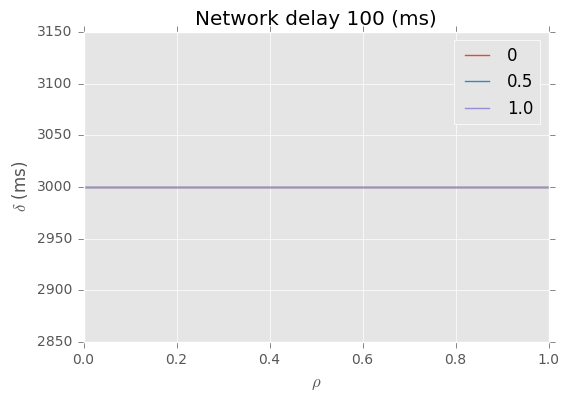

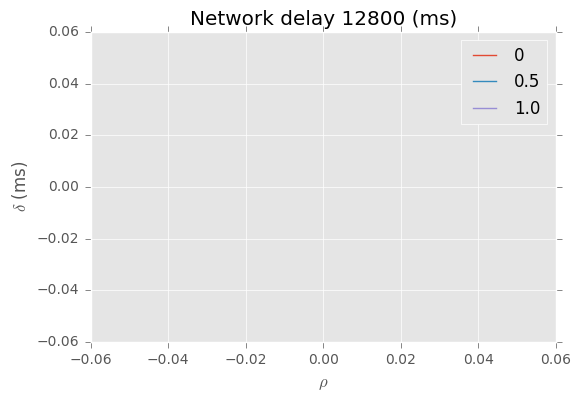

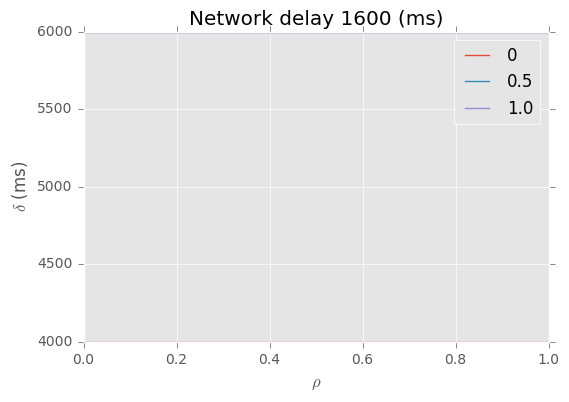

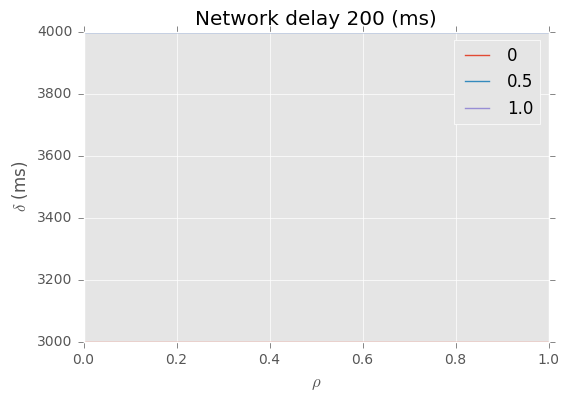

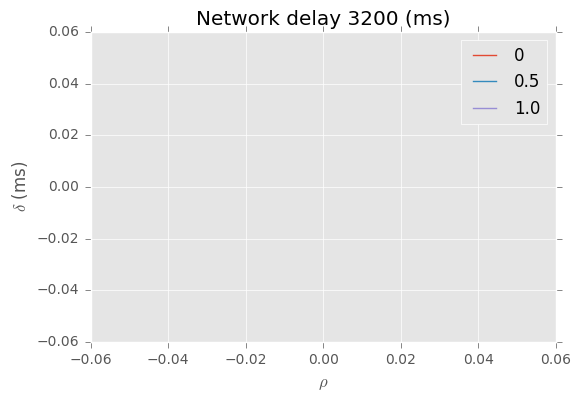

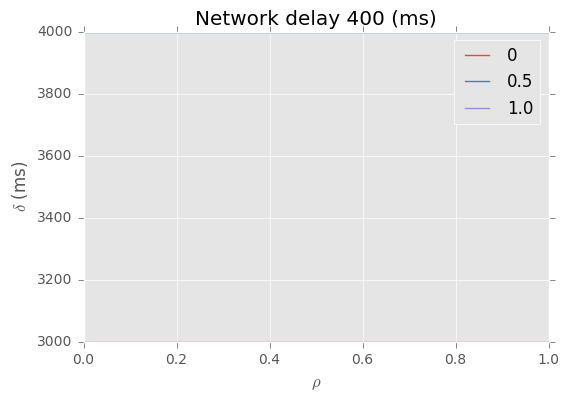

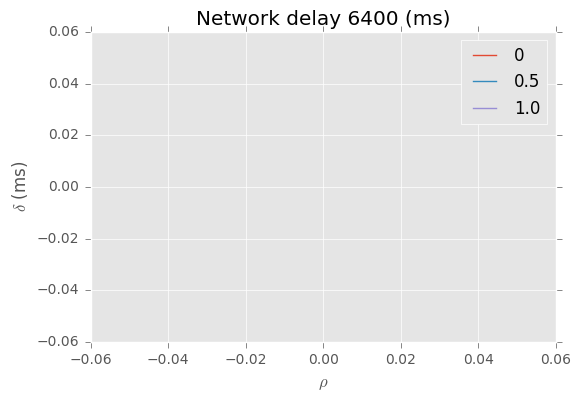

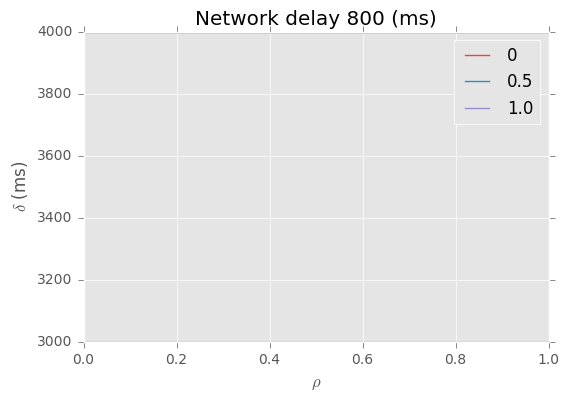

In [126]:
maxProgress = []
for file in glob.iglob("../Builds/VisualStudio2015/fProgress.delay*.csv"):
    delay = re.search(r"delay([0-9]+)", file).group(1)
    fProgress = pd.read_csv(file)
    ps = np.linspace(0,1)
    byID = fProgress.groupby("Peer")
    plt.figure()
    for q in [0, 0.5, 1.0]:
        # First quantile is over delays for all ledgers for each peer
        # Second quantile is over the first quantile delay for all peers
        delayPerPeer = byID["Delay"].quantile(q, interpolation='lower')
        qs = delayPerPeer.quantile(ps, interpolation='lower')
        plt.plot(ps, qs, label = q)
    maxProgress.append({"NetDelay" : int(delay), "ProgressDelay" : fProgress["Delay"].max()})
    plt.legend(loc = 'best')
    plt.xlabel(r"$\rho$")
    plt.ylabel(r"$\delta$ (ms)")
    plt.title(r"Network delay {0} (ms)".format(delay))

maxProgress = pd.DataFrame(maxProgress).sort_values("NetDelay")

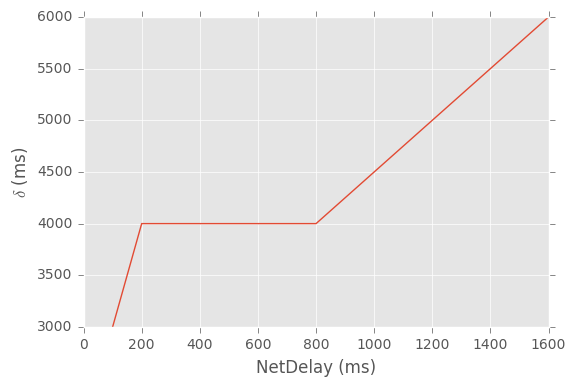

In [127]:
plt.plot(maxProgress["NetDelay"], maxProgress["ProgressDelay"])
plt.xlabel("NetDelay (ms)")
plt.ylabel(r"$\delta$ (ms)")


In [128]:
maxProgress

,NetDelay,ProgressDelay
0,100,3000.0
3,200,4000.0
5,400,4000.0
7,800,4000.0
2,1600,6000.0
4,3200,NaN
6,6400,NaN
1,12800,NaN


### Tx Progress vs NetDelay

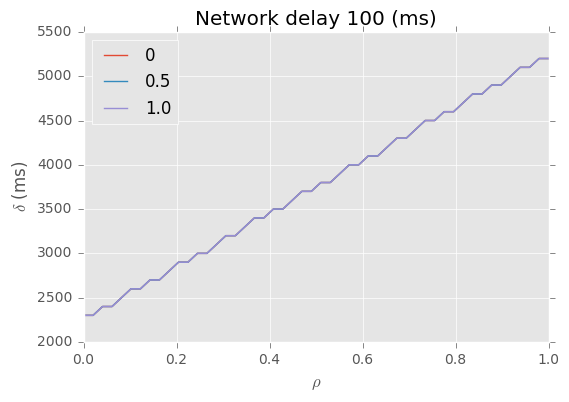

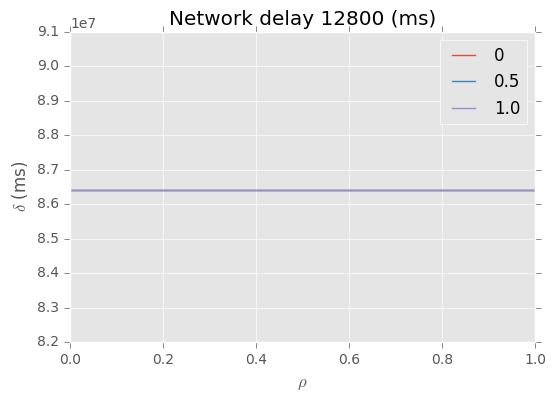

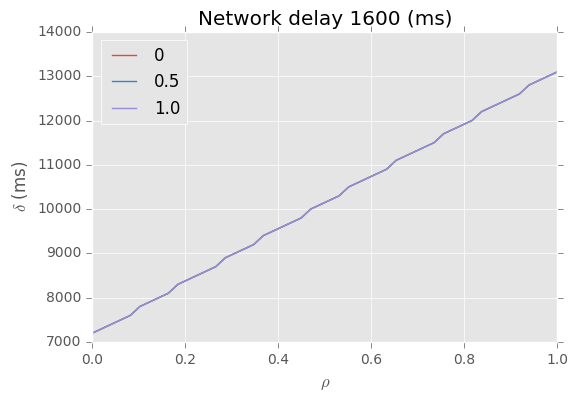

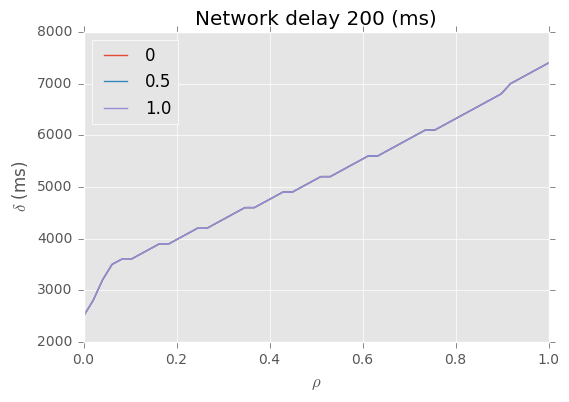

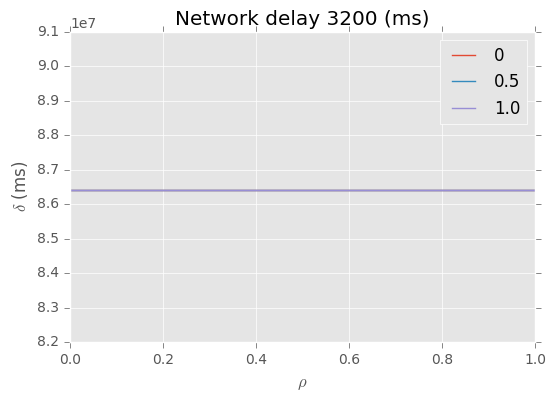

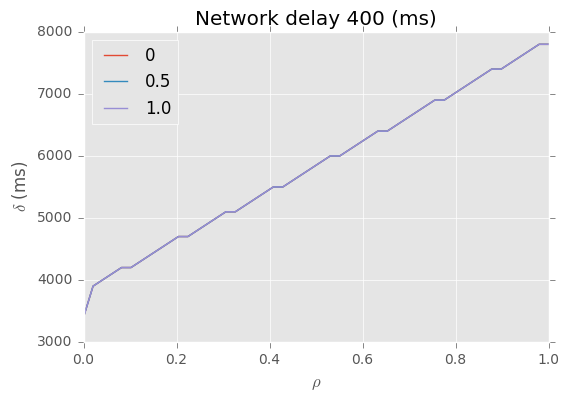

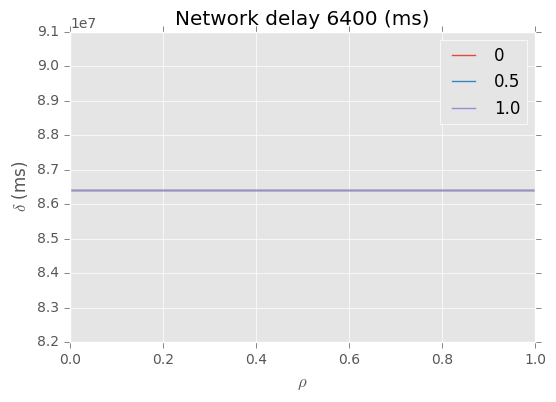

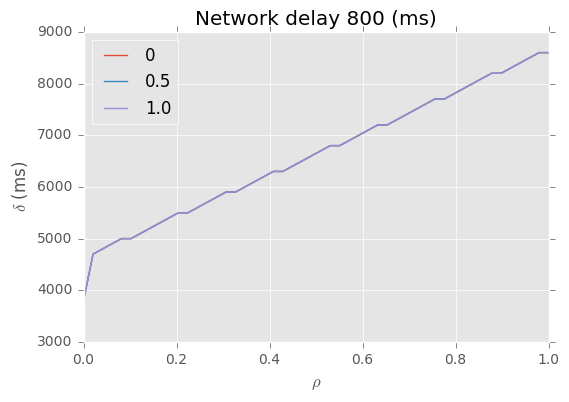

In [129]:
maxTxProgress = []
for file in glob.iglob("../Builds/VisualStudio2015/txProgress.delay*.csv"):
    delay = re.search(r"delay([0-9]+)", file).group(1)
    txProgress = pd.read_csv(file)

    ps = np.linspace(0,1)
    byID = txProgress.groupby("TxID")
    plt.figure()
    for q in [0, 0.5, 1.0]:
        # First quantile is over delays of a specific transaction for each peer
        # Second quantile is over the first quantile delay for all transactions
        delayPerTx = byID["Delay"].quantile(q, interpolation='lower')
        qs = delayPerTx.quantile(ps, interpolation='lower')
        plt.plot(ps, qs, label = q)
    maxTxProgress.append({"NetDelay" : int(delay), "TxProgressDelay" : txProgress["Delay"].max()})
    plt.legend(loc = 'best')
    plt.xlabel(r"$\rho$")
    plt.ylabel(r"$\delta$ (ms)")
    plt.title(r"Network delay {0} (ms)".format(delay))
maxTxProgress = pd.DataFrame(maxTxProgress).sort_values("NetDelay")

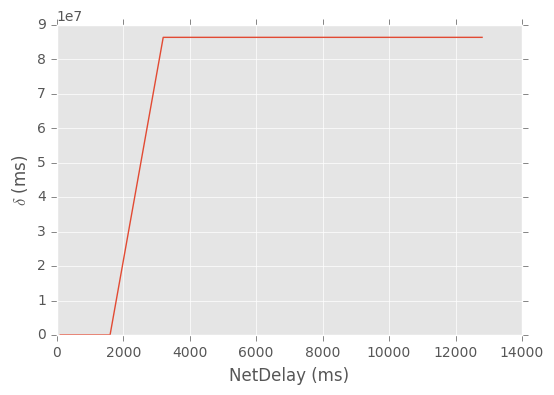

In [130]:
plt.plot(maxTxProgress["NetDelay"], maxTxProgress["TxProgressDelay"])
plt.xlabel("NetDelay (ms)")
plt.ylabel(r"$\delta$ (ms)")


In [131]:
maxTxProgress

,NetDelay,TxProgressDelay
0,100,5200
3,200,7400
5,400,7800
7,800,8600
2,1600,13100
4,3200,86400000
6,6400,86400000
1,12800,86400000
